 **Name : Indra Awal Priyanto**

**Neptune ID : FDAW78**

**Change Detection on CDN Dataset**

**1. Import CDN Dataset**

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14TMBl6tfV2BZ1QQZCs0HeasngNLmnUUn
To: /content/data.xlsx
100% 17.4M/17.4M [00:00<00:00, 60.9MB/s]


**2. Import Library**

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import ipywidgets as widgets

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import preprocessing, svm
import tensorflow as tf 
import sys
import missingno as mno
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

**3. Explore Data**

In [5]:
data_xls = pd.read_excel('data.xlsx', 'cdn_customer_qoe_anon', dtype=str, index_col=None)
data_xls.to_csv('data.csv', encoding='utf-8', index=False)

In the dataset, there are two column, "Start Time" and "End Time" contain datetime data. Parse this two column into datetime format for Time Series Analysis and check the amount of data on in the sequence.

In [6]:
df = pd.read_csv("data.csv", parse_dates=["Start Time", "End Time"])
df.head()

Column1          Start Time  Playtime  Effective Playtime  Interruptions  \
0        0 2022-07-12 00:00:14        11                  10              0   
1        1 2022-07-12 00:00:38        73                  72              0   
2        2 2022-07-12 00:02:02        21                  20              0   
3        3 2022-07-12 00:02:24         1                   0              0   
4        4 2022-07-12 00:02:25         1                   0              0   

   Join Time  Buffer Ratio CDN Node Host Connection Type      Device  \
0      0.879           0.0           NaN    Ethernet-100  Android TV   
1      1.170           0.0           NaN          WiFi-5  Android TV   
2      1.133           0.0           NaN          WiFi-5  Android TV   
3      0.000           0.0           NaN          WiFi-5  Android TV   
4      0.000           0.0           NaN          WiFi-5  Android TV   

  Device Type          Browser  Browser Version       OS  OS Version  \
0          TV  Android Browser  Android Browser  Android  Android 10   
1          TV  Android Browser  Android Browser  Android  Android 10   
2          TV  Android Browser  Android Browser  Android  Android 10   
3          TV  Android Browser  Android Browser  Android  Android 10   
4          TV  Android Browser  Android Browser  Android  Android 10   

                              Device ID Happiness Value  Happiness Score  \
0  186ba46d-4400-39df-8693-1ca9d25caf48   Smile (7-8.5)            7.393   
1  35f76782-6990-3fa2-bdb8-0f35a2c5569c  Happy (8.5-10)            9.399   
2  16846b9d-4bd6-3b16-a464-cb99378f3249   Neutral (5-7)            6.999   
3  16846b9d-4bd6-3b16-a464-cb99378f3249     Angry (0-3)            0.000   
4  16846b9d-4bd6-3b16-a464-cb99378f3249     Angry (0-3)            0.000   

   Playback Stalls  Startup Error (Count)  Latency            End Time  \
0              0.0                      0    19504 2022-10-04 00:00:26   
1              0.0                      0    19033 2022-10-04 00:01:52   
2              0.0                      0    19071 2022-10-04 00:02:24   
3              0.0                      0        0 2022-10-04 00:02:26   
4              0.0                      0        0 2022-10-04 00:02:28   

  Crash Status End of Playback Status  User_ID_N  Title_N  Program_N  \
0          NaN                On Stop        564      784          0   
1          NaN                On Stop        480        1          0   
2          NaN                On Stop        346      786          0   
3          NaN                On Stop        346      997          0   
4          NaN                On Stop        346      997          0   

   Device_Vendor_N  Device_Model_N  Content_TV_Show_N  Country_N  City_N  \
0               16              64               2672          3     263   
1               13              63               2672          3      76   
2               13              63               2672          3      76   
3               13              63               2672          3      76   
4               13              63               2672          3      76   

   Region_N  
0         0  
1         0  
2         0  
3         0  
4         0

In [7]:
df.tail()

Column1          Start Time  Playtime  Effective Playtime  \
102251   102251 2022-07-25 23:06:05     15282                   0   
102252   102252 2022-07-25 22:55:39     16582               16581   
102253   102253 2022-07-25 23:09:33     21166                   0   
102254   102254 2022-07-25 11:47:37     65122               65115   
102255   102255 2022-07-25 14:07:08     75837               75717   

        Interruptions  Join Time  Buffer Ratio CDN Node Host Connection Type  \
102251              0      0.000         0.000           NaN          Mobile   
102252              0      0.990         0.000      11377663          WiFi-5   
102253              0      0.000         0.000           NaN          WiFi-5   
102254              2      6.103         0.001           NaN            None   
102255              0    120.000         0.000           NaN          WiFi-5   

               Device Device Type          Browser   Browser Version       OS  \
102251         iPhone  SmartPhone    Mobile Safari     Mobile Safari      iOS   
102252     Android TV          TV  Android Browser   Android Browser  Android   
102253        Android  STBAndroid  Android Browser   Android Browser  Android   
102254  PC( Windows )          PC           Chrome  Chrome 106.0.0.0  Windows   
102255        Android  STBAndroid  Android Browser   Android Browser  Android   

          OS Version                             Device ID Happiness Value  \
102251  iOS iOS:15.2  341C9AAD-8C51-4892-B3A8-E83EFE85439E     Angry (0-3)   
102252    Android 10  68c8ec91-d840-3939-be6f-b47410fc40c2  Happy (8.5-10)   
102253    Android 10  5b63edc5-6b14-3d17-b2b3-654b438d14cb     Angry (0-3)   
102254    Windows 10  bc64afea-dafa-4d58-bdd2-60ac8de742c2   Smile (7-8.5)   
102255    Android 10  a6d4fc0c-c548-490f-a5aa-d9de96cce74f     Angry (0-3)   

        Happiness Score  Playback Stalls  Startup Error (Count)  Latency  \
102251            0.000              0.0                      0        0   
102252            9.998              0.0                      0    18191   
102253            0.000              0.0                      0        0   
102254            7.465              0.0                      0    27550   
102255            0.000              0.0                      1    36285   

                  End Time Crash Status End of Playback Status  User_ID_N  \
102251 2022-10-18 03:20:47          NaN                On Stop        570   
102252 2022-10-18 03:32:02          NaN                On Stop        475   
102253 2022-10-18 05:02:21          NaN                On Stop        249   
102254 2022-10-18 05:53:00          NaN                On Stop        622   
102255 2022-10-18 11:11:06          NaN                On Stop        101   

        Title_N  Program_N  Device_Vendor_N  Device_Model_N  \
102251     1504          0                2             153   
102252     1014          0               13              63   
102253     1076          0               16              41   
102254     1437          0                8             158   
102255      902          0               13              15   

        Content_TV_Show_N  Country_N  City_N  Region_N  
102251               2434          3     367         0  
102252               2672          3      39         0  
102253               2672          3      56         0  
102254                694          3      56         0  
102255               2672          3     263         0

The dataset consist of 10256 row

Minimum and Maximum time in Column Start Time

In [8]:
df["Start Time"].min(), df["Start Time"].max()

(Timestamp('2022-07-12 00:00:14'), Timestamp('2022-07-25 23:59:56'))

Minimum and Maximum time in Column Start Time

In [9]:
df["End Time"].min(), df["End Time"].max()

(Timestamp('2022-10-04 00:00:26'), Timestamp('2022-10-18 11:11:06'))

Check Unique Value from every column

In [10]:
df.nunique()

Column1                   102256
Start Time                 96503
Playtime                    4752
Effective Playtime          4440
Interruptions                 43
Join Time                   5554
Buffer Ratio                2076
CDN Node Host                342
Connection Type               19
Device                        15
Device Type                   13
Browser                       15
Browser Version               64
OS                             9
OS Version                    78
Device ID                   1692
Happiness Value                5
Happiness Score             6534
Playback Stalls              425
Startup Error (Count)          2
Latency                    13416
End Time                   96251
Crash Status                   2
End of Playback Status         4
User_ID_N                    700
Title_N                     1639
Program_N                      1
Device_Vendor_N               25
Device_Model_N               164
Content_TV_Show_N           2747
Country_N 

Check data type for every column

In [11]:
df.dtypes

Column1                            int64
Start Time                datetime64[ns]
Playtime                           int64
Effective Playtime                 int64
Interruptions                      int64
Join Time                        float64
Buffer Ratio                     float64
CDN Node Host                     object
Connection Type                   object
Device                            object
Device Type                       object
Browser                           object
Browser Version                   object
OS                                object
OS Version                        object
Device ID                         object
Happiness Value                   object
Happiness Score                  float64
Playback Stalls                  float64
Startup Error (Count)              int64
Latency                            int64
End Time                  datetime64[ns]
Crash Status                      object
End of Playback Status            object
User_ID_N       

**3.1 Handling Missing Values**

In [12]:
df.isna().sum()

Column1                        0
Start Time                     0
Playtime                       0
Effective Playtime             0
Interruptions                  0
Join Time                      0
Buffer Ratio                   0
CDN Node Host              65277
Connection Type                0
Device                         0
Device Type                    0
Browser                        0
Browser Version              845
OS                             0
OS Version                     0
Device ID                      0
Happiness Value                1
Happiness Score                0
Playback Stalls                0
Startup Error (Count)          0
Latency                        0
End Time                       0
Crash Status              100411
End of Playback Status         1
User_ID_N                      0
Title_N                        0
Program_N                      0
Device_Vendor_N                0
Device_Model_N                 0
Content_TV_Show_N              0
Country_N 

Find several missing values in columns [CDN Node Host, Browser Version, Happines Value, and End of Playback Status], Drop those columns. For other column, fill the missing values with other values.

Also delete column1 and End Time since we will not use them

In [13]:
df = df.drop(["Column1", "CDN Node Host", "Browser Version", "End Time"], axis = 1)

#Fill Crash Status Column
df["Crash Status"] = df["Crash Status"].astype('category')
df["Crash Status"] = df["Crash Status"].cat.add_categories("No Error Crash").fillna("No Error Crash")
df["Crash Status"] = df["Crash Status"].astype('object')

#fill Happiness Value Column
df["Happiness Value"] = df["Happiness Value"].astype('category')
df["Happiness Value"] = df["Happiness Value"].fillna("Angry (0-3)")
df["Happiness Value"] = df["Happiness Value"].astype('object')

#Fill End Of Playback Status Column
df["End of Playback Status"] = df["End of Playback Status"].astype('category')
df["End of Playback Status"] = df["End of Playback Status"].fillna("On Stop")
df["End of Playback Status"] = df["End of Playback Status"].astype('object')

df.isna().sum()

Start Time                0
Playtime                  0
Effective Playtime        0
Interruptions             0
Join Time                 0
Buffer Ratio              0
Connection Type           0
Device                    0
Device Type               0
Browser                   0
OS                        0
OS Version                0
Device ID                 0
Happiness Value           0
Happiness Score           0
Playback Stalls           0
Startup Error (Count)     0
Latency                   0
Crash Status              0
End of Playback Status    0
User_ID_N                 0
Title_N                   0
Program_N                 0
Device_Vendor_N           0
Device_Model_N            0
Content_TV_Show_N         0
Country_N                 0
City_N                    0
Region_N                  0
dtype: int64

There are no more missing values

In [14]:
df.head()

Start Time  Playtime  Effective Playtime  Interruptions  Join Time  \
0 2022-07-12 00:00:14        11                  10              0      0.879   
1 2022-07-12 00:00:38        73                  72              0      1.170   
2 2022-07-12 00:02:02        21                  20              0      1.133   
3 2022-07-12 00:02:24         1                   0              0      0.000   
4 2022-07-12 00:02:25         1                   0              0      0.000   

   Buffer Ratio Connection Type      Device Device Type          Browser  \
0           0.0    Ethernet-100  Android TV          TV  Android Browser   
1           0.0          WiFi-5  Android TV          TV  Android Browser   
2           0.0          WiFi-5  Android TV          TV  Android Browser   
3           0.0          WiFi-5  Android TV          TV  Android Browser   
4           0.0          WiFi-5  Android TV          TV  Android Browser   

        OS  OS Version                             Device ID Happiness Value  \
0  Android  Android 10  186ba46d-4400-39df-8693-1ca9d25caf48   Smile (7-8.5)   
1  Android  Android 10  35f76782-6990-3fa2-bdb8-0f35a2c5569c  Happy (8.5-10)   
2  Android  Android 10  16846b9d-4bd6-3b16-a464-cb99378f3249   Neutral (5-7)   
3  Android  Android 10  16846b9d-4bd6-3b16-a464-cb99378f3249     Angry (0-3)   
4  Android  Android 10  16846b9d-4bd6-3b16-a464-cb99378f3249     Angry (0-3)   

   Happiness Score  Playback Stalls  Startup Error (Count)  Latency  \
0            7.393              0.0                      0    19504   
1            9.399              0.0                      0    19033   
2            6.999              0.0                      0    19071   
3            0.000              0.0                      0        0   
4            0.000              0.0                      0        0   

     Crash Status End of Playback Status  User_ID_N  Title_N  Program_N  \
0  No Error Crash                On Stop        564      784          0   
1  No Error Crash                On Stop        480        1          0   
2  No Error Crash                On Stop        346      786          0   
3  No Error Crash                On Stop        346      997          0   
4  No Error Crash                On Stop        346      997          0   

   Device_Vendor_N  Device_Model_N  Content_TV_Show_N  Country_N  City_N  \
0               16              64               2672          3     263   
1               13              63               2672          3      76   
2               13              63               2672          3      76   
3               13              63               2672          3      76   
4               13              63               2672          3      76   

   Region_N  
0         0  
1         0  
2         0  
3         0  
4         0

In [15]:
import plotly.express as px 

fig = px.line(df, x="Start Time", y="Playtime")
fig

**3.2 Exploratory Data Analysis (EDA)**

In this section, exploring more about the dataset, making new variable for a pair of column Playtime and Start Time. We choose Playtime because it represent time series data from the dataset. in the following section we Will focusing in this two column for the Time Series analysis.

In [16]:
df.head()

Start Time  Playtime  Effective Playtime  Interruptions  Join Time  \
0 2022-07-12 00:00:14        11                  10              0      0.879   
1 2022-07-12 00:00:38        73                  72              0      1.170   
2 2022-07-12 00:02:02        21                  20              0      1.133   
3 2022-07-12 00:02:24         1                   0              0      0.000   
4 2022-07-12 00:02:25         1                   0              0      0.000   

   Buffer Ratio Connection Type      Device Device Type          Browser  \
0           0.0    Ethernet-100  Android TV          TV  Android Browser   
1           0.0          WiFi-5  Android TV          TV  Android Browser   
2           0.0          WiFi-5  Android TV          TV  Android Browser   
3           0.0          WiFi-5  Android TV          TV  Android Browser   
4           0.0          WiFi-5  Android TV          TV  Android Browser   

        OS  OS Version                             Device ID Happiness Value  \
0  Android  Android 10  186ba46d-4400-39df-8693-1ca9d25caf48   Smile (7-8.5)   
1  Android  Android 10  35f76782-6990-3fa2-bdb8-0f35a2c5569c  Happy (8.5-10)   
2  Android  Android 10  16846b9d-4bd6-3b16-a464-cb99378f3249   Neutral (5-7)   
3  Android  Android 10  16846b9d-4bd6-3b16-a464-cb99378f3249     Angry (0-3)   
4  Android  Android 10  16846b9d-4bd6-3b16-a464-cb99378f3249     Angry (0-3)   

   Happiness Score  Playback Stalls  Startup Error (Count)  Latency  \
0            7.393              0.0                      0    19504   
1            9.399              0.0                      0    19033   
2            6.999              0.0                      0    19071   
3            0.000              0.0                      0        0   
4            0.000              0.0                      0        0   

     Crash Status End of Playback Status  User_ID_N  Title_N  Program_N  \
0  No Error Crash                On Stop        564      784          0   
1  No Error Crash                On Stop        480        1          0   
2  No Error Crash                On Stop        346      786          0   
3  No Error Crash                On Stop        346      997          0   
4  No Error Crash                On Stop        346      997          0   

   Device_Vendor_N  Device_Model_N  Content_TV_Show_N  Country_N  City_N  \
0               16              64               2672          3     263   
1               13              63               2672          3      76   
2               13              63               2672          3      76   
3               13              63               2672          3      76   
4               13              63               2672          3      76   

   Region_N  
0         0  
1         0  
2         0  
3         0  
4         0

In [17]:
ts = df.groupby("Start Time")["Playtime"].sum().rename("playing_time")
ts.head()

Start Time
2022-07-12 00:00:14     11
2022-07-12 00:00:15    241
2022-07-12 00:00:25    124
2022-07-12 00:00:38     73
2022-07-12 00:01:52    254
Name: playing_time, dtype: int64

From grouping the time series data, it can be seen that there are 5 group of time data

<Axes: xlabel='Start Time'>

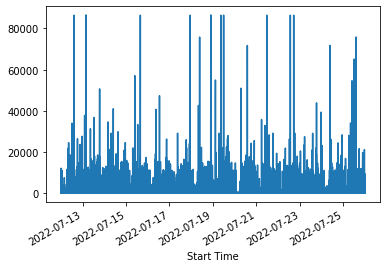

In [18]:
ts.plot()

From the graph, it can be seen that the dataset have 2 weeks time window from 2022-07-13 to 2022-07-25

**Trend Analysis**

The trend is the component of a time series that represents variations of low frequency in a time series, the high and medium frequency fluctuations having been filtered out.

The objective of this analysis is to understand if there is a trend in the data and whether this pattern is linear or not. The best tool for this job is visualization.

In [19]:
'''
Plot ts with rolling mean and 95% confidence interval with rolling std.
:parameter    
  :param ts: pandas Series    
  :param window: num - for rolling stats
  :param plot_ma: bool - whether plot moving average
  :param plot_intervals: bool - whether plot upper and lower bounds
'''
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,
            figsize=(15,5)):    
   rolling_mean = ts.rolling(window=window).mean()    
   rolling_std = ts.rolling(window=window).std()
   plt.figure(figsize=figsize)    
   plt.title(ts.name)    
   plt.plot(ts[window:], label='Actual values', color="black")    
   if plot_ma:        
      plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="red")    
   if plot_intervals:
      lower_bound = rolling_mean - (1.96 * rolling_std)
      upper_bound = rolling_mean + (1.96 * rolling_std)
   plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
   plt.legend(loc='best')
   plt.grid(True)
   plt.show()

When the dataset has 2 weeks day of observation, start a rolling window with half of it, which is 7 days:

<ipython-input-19-53b3c5f9e5ce>:17: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.



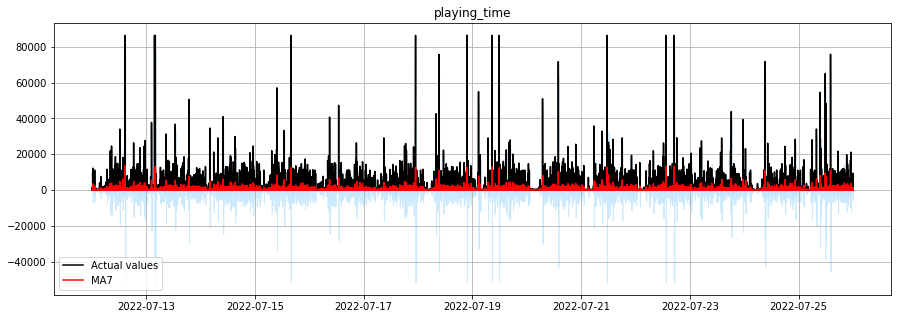

In [20]:
plot_ts(ts, window=7)

Check at the red line in the plot, it can be seen a pattern similar with the time series plot

<ipython-input-19-53b3c5f9e5ce>:17: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.



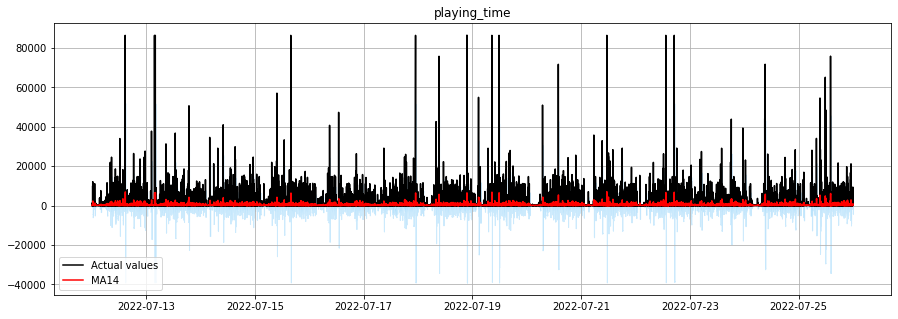

In [21]:
plot_ts(ts, window=14)

When a rolling window of 2 weeks is used it is obvious getting more similar with the original time series itself. It is a clear, the dataset not have trend component exists and we can assume it is because there are outliers in the dataset. This is useful in model design as most of the models require to specify whether the trend component exists and whether it is linear (also said “additive”) or non-linear (also said“multiplicative”).

**Outlier Detection**

An outlier is a data value that lies in the tail of the statistical distribution of a set of data values.

The objective of this section is to spot outliers and decide how to handle them. In practice, traditional deterministic methods are often used, like plotting the distribution and label as an outlier every observations higher or lower than a chosen threshold. For example:

<Axes: >

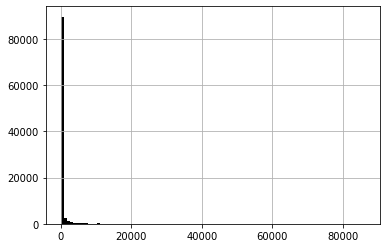

In [22]:
## Plot histogram
ts.hist(color="black", bins=100)

<Axes: >

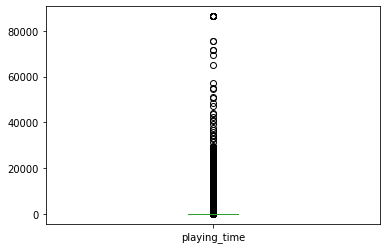

In [23]:
## Boxplot
ts.plot.box()

From 2 graph above, it can be seen that there are outliers in the dataset.
This kind of method work especially when we are very familiar with the data and know what kind of process and distribution it follows and therefore what threshold works better. However, there is easier way to let a machine learning algorithm do this for any kind of time series dataset.

using a clustering algorithm from the scikit-learn library: one-class support vector machine, it learns the boundaries of the distribution (called “support”) and is therefore able to classify any points that lie outside the boundary as outliers.

In [24]:
'''
Find outliers using sklearn unsupervised support vetcor machine.
:parameter
    :param ts: pandas Series
    :param perc: float - percentage of outliers to look for
:return
    dtf with raw ts, outlier 1/0 (yes/no), numeric index
'''
def find_outliers(ts, perc=0.01, figsize=(15,5)):
    ## fit svm
    scaler = preprocessing.StandardScaler()
    ts_scaled = scaler.fit_transform(ts.values.reshape(-1,1))
    model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
    model.fit(ts_scaled)
    ## dtf output
    dtf_outliers = ts.to_frame(name="ts")
    dtf_outliers["index"] = range(len(ts))
    dtf_outliers["outlier"] = model.predict(ts_scaled)
    dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda
                                              x: 1 if x==-1 else 0)
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(title="Outliers detection: found"
           +str(sum(dtf_outliers["outlier"]==1)))
    ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
            color="black")
    ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
               y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
               color='red')
    ax.grid(True)
    plt.show()
    return dtf_outliers

This function will be able to spot outliers, because time series forecasting is easier without data points that differ significantly from other observations (outliers), but removing these points can deeply change the distribution of the data. Tto exclude the outliers, the most convenient way to remove them is by interpolation.

In [25]:
'''
Interpolate outliers in a ts.
'''
def remove_outliers(ts, outliers_idx, figsize=(15,5)):
    ts_clean = ts.copy()
    ts_clean.loc[outliers_idx] = np.nan
    ts_clean = ts_clean.interpolate(method="linear")
    ax = ts.plot(figsize=figsize, color="red", alpha=0.5,
         title="Remove outliers", label="original", legend=True)
    ts_clean.plot(ax=ax, grid=True, color="black",
                  label="interpolated", legend=True)
    plt.show()
    return ts_clean

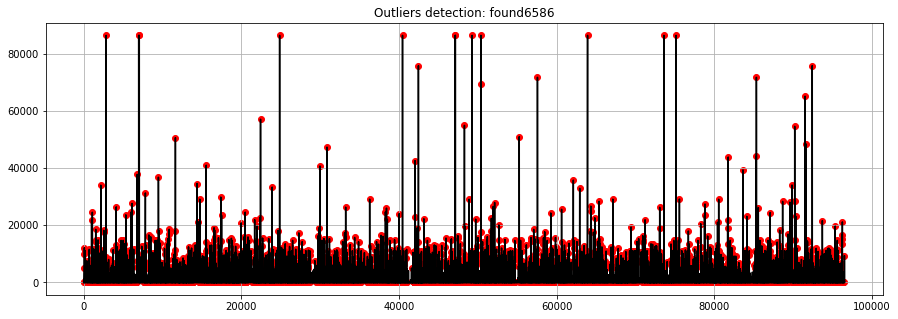

In [26]:
dtf_outliers = find_outliers(ts, perc=0.05)

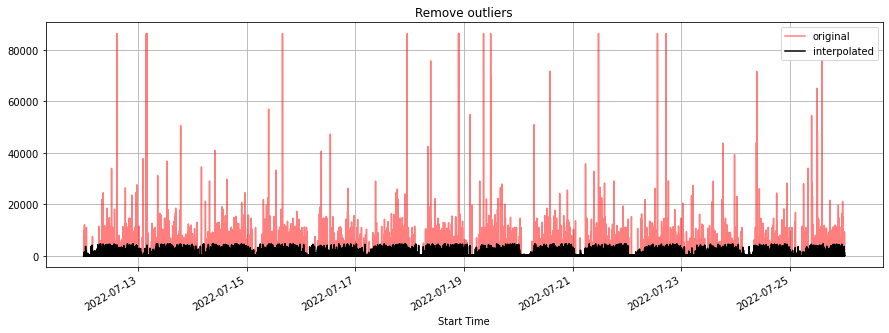

In [27]:
## outliers index position
outliers_index_pos = dtf_outliers[dtf_outliers["outlier"]==1].index
## exclude outliers
ts_clean = remove_outliers(ts, outliers_idx=outliers_index_pos)

**Stationarity Test**

A stationary process is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time, therefore stationary time series are easier to forecast.

There are several ways to establish whether a time series is stationary or not, the most common are good old visualization, looking at the autocorrelation and running statistical tests.

The most common test is the Dickey-Fuller test (also called “ADF test”) where the null hypothesis is that the time series has a unit root, in other words, that the time series is not stationary.

In [28]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as smt

def test_stationarity_acf_pacf(ts, sample=0.20, maxlag=30, figsize=(15,10)):
    with plt.style.context(style='bmh'):
        ## set figure
        fig = plt.figure(figsize=figsize)
        ts_ax = plt.subplot2grid(shape=(2,2), loc=(0,0), colspan=2)
        pacf_ax = plt.subplot2grid(shape=(2,2), loc=(1,0))
        acf_ax = plt.subplot2grid(shape=(2,2), loc=(1,1))
        
        ## plot ts with mean/std of a sample from the first x% 
        dtf_ts = ts.to_frame(name="ts")
        sample_size = int(len(ts)*sample)
        dtf_ts["mean"] = dtf_ts["ts"].head(sample_size).mean()
        dtf_ts["lower"] = dtf_ts["ts"].head(sample_size).mean() + dtf_ts["ts"].head(sample_size).std()
        dtf_ts["upper"] = dtf_ts["ts"].head(sample_size).mean() - dtf_ts["ts"].head(sample_size).std()
        dtf_ts["ts"].plot(ax=ts_ax, color="black", legend=False)
        dtf_ts["mean"].plot(ax=ts_ax, legend=False, color="red",
                            linestyle="--", linewidth=0.7)
        ts_ax.fill_between(x=dtf_ts.index, y1=dtf_ts['lower'], 
                y2=dtf_ts['upper'], color='lightskyblue', alpha=0.4)
        dtf_ts["mean"].head(sample_size).plot(ax=ts_ax,
                legend=False, color="red", linewidth=0.9)
        ts_ax.fill_between(x=dtf_ts.head(sample_size).index, 
                           y1=dtf_ts['lower'].head(sample_size), 
                           y2=dtf_ts['upper'].head(sample_size),
                           color='lightskyblue')
        
        ## test stationarity (Augmented Dickey-Fuller)
        adfuller_test = sm.tsa.stattools.adfuller(ts, maxlag=maxlag,
                                                  autolag="AIC")
        adf, p, critical_value = adfuller_test[0], adfuller_test[1], adfuller_test[4]["5%"]
        p = round(p, 3)
        conclusion = "Stationary" if p < 0.05 else "Non-Stationary"
        ts_ax.set_title('Dickey-Fuller Test 95%: '+conclusion+
                        '(p value: '+str(p)+')')
        
        ## pacf (for AR) e acf (for MA) 
        smt.plot_pacf(ts, lags=maxlag, ax=pacf_ax, 
                 title="Partial Autocorrelation (for AR component)")
        smt.plot_acf(ts, lags=maxlag, ax=acf_ax,
                 title="Autocorrelation (for MA component)")
        plt.tight_layout()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



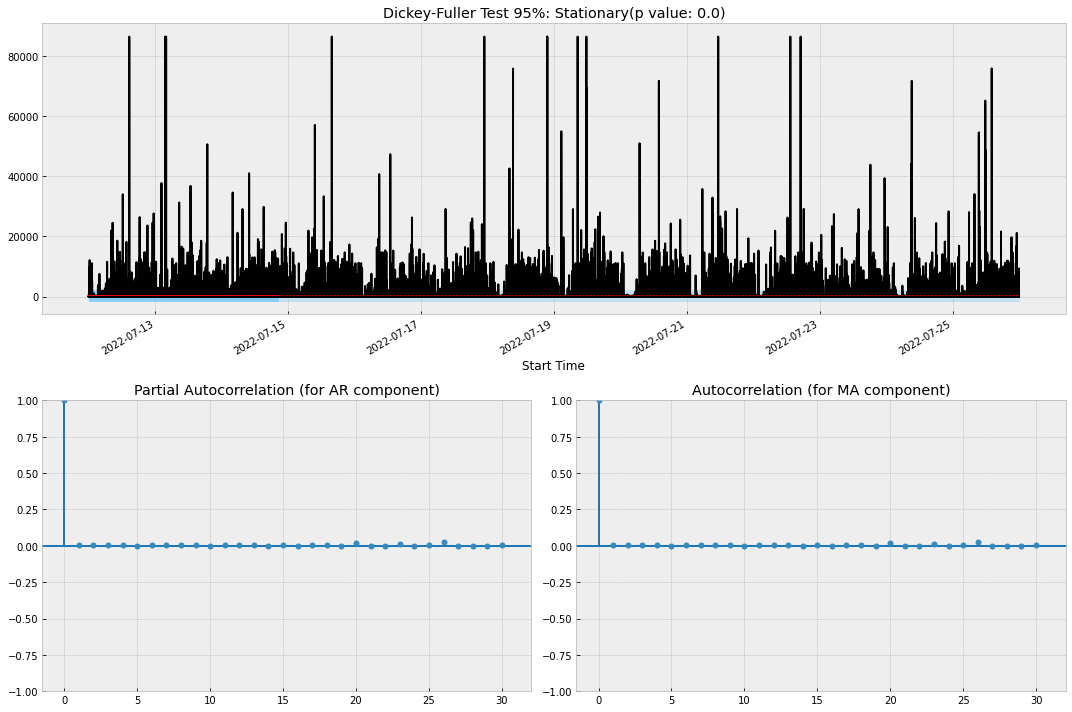

In [29]:
test_stationarity_acf_pacf(ts, sample=0.20, maxlag=30)

The result of the Dickey-Fuller test indicates that the time series might be not stationary as we can't reject the null hypothesis of non-stationarity with a confidence level of 95% (p-value of 0.0 < α of 1.0). And this also happen probably because of the outliers in the dataset. 

**Seasonality Analysis**

The seasonal component is that part of the variations in a time series representing 2 weeks of fluctuations with respect to timing, direction and magnitude.

The objective of this last section is to understand what kind of seasonality is affecting the data (weekly seasonality if it presents fluctuations every 7 days.

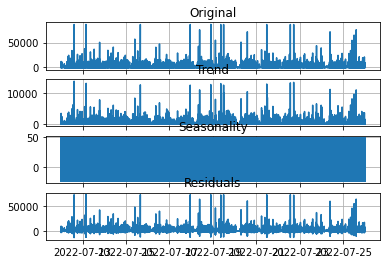

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid   
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=False)
ax[0].plot(ts)
ax[0].set_title('Original')
ax[0].grid(True) 
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[1].grid(True)  
ax[2].plot(seasonal)
ax[2].set_title('Seasonality')
ax[2].grid(True)  
ax[3].plot(residual)
ax[3].set_title('Residuals')
ax[3].grid(True)


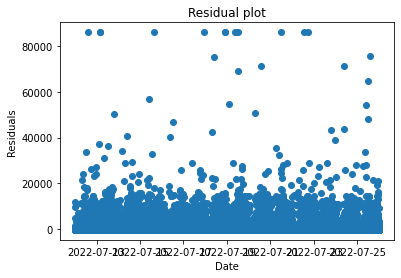

In [31]:
tss = sm.add_constant(range(len(ts)))
model = sm.OLS(ts, tss).fit()

# Calculate residuals
residuals = model.resid

# Visualize residuals using a scatter plot
plt.scatter(ts.index, residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

If a time series shows a pattern but does not exhibit seasonality, it could be due to other factors such as trends, cycles, or irregular fluctuations. From graph above, it can be seen that the dataset is not trend or seasonality. So, it can be irregular fluctuation data

Irregular fluctuations, also known as noise or residuals, are random fluctuations in the data that cannot be explained by trends, cycles, or seasonality. Irregular fluctuations can be caused by measurement error, random events, or other factors.

Try to perform change detection with the residual dataset

Normalization first

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Y = scaler.fit_transform(pd.DataFrame(ts))

In this phase, we try to perform change detection using Moving Average method in the residual datasaet, it is not the best method but this is the simplest one to check changepoint in time series data with residual

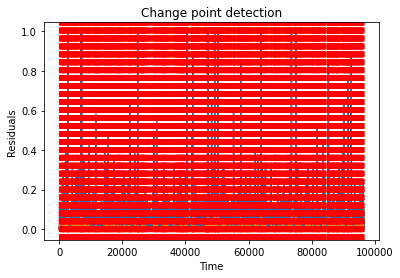

In [33]:
from scipy import signal

# Fit a linear regression model
xx = sm.add_constant(range(len(Y)))
model = sm.OLS(Y, xx).fit()

# Calculate residuals
residuals = model.resid

# Calculate moving average of residuals
window_size = 14
ma = signal.convolve(residuals, np.ones(window_size)/window_size, mode='same')

# Calculate difference between residuals and moving average
diff = residuals - ma

# Perform change point detection on difference
threshold = 2.0 * np.std(diff)
change_points = np.where(abs(diff) > threshold)[0]

# Visualize change points
plt.plot(residuals)
plt.plot(ma)
for cp in change_points:
    plt.axvline(x=cp, linestyle='--', color='red')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Change point detection')
plt.show()


It can be seen, performing change detection with residual data is not good idea since the data is fluctuates over time by time. We need to cleaning the data from residual before performing Machine Learning part for Change Detection 

**4. Preprocessing Data**

In [34]:
df.set_index("Start Time", inplace=True)

Perform Label encoding for categorical data

In [35]:
for i in df.select_dtypes('object').columns:
  le = LabelEncoder().fit(df[i])
  df[i] = le.transform(df[i]) 

df.head()

Playtime  Effective Playtime  Interruptions  Join Time  \
Start Time                                                                    
2022-07-12 00:00:14        11                  10              0      0.879   
2022-07-12 00:00:38        73                  72              0      1.170   
2022-07-12 00:02:02        21                  20              0      1.133   
2022-07-12 00:02:24         1                   0              0      0.000   
2022-07-12 00:02:25         1                   0              0      0.000   

                     Buffer Ratio  Connection Type  Device  Device Type  \
Start Time                                                                
2022-07-12 00:00:14           0.0                7       1           10   
2022-07-12 00:00:38           0.0               16       1           10   
2022-07-12 00:02:02           0.0               16       1           10   
2022-07-12 00:02:24           0.0               16       1           10   
2022-07-12 00:02:25           0.0               16       1           10   

                     Browser  OS  OS Version  Device ID  Happiness Value  \
Start Time                                                                 
2022-07-12 00:00:14        0   0           0        209                4   
2022-07-12 00:00:38        0   0           0        387                1   
2022-07-12 00:02:02        0   0           0        197                2   
2022-07-12 00:02:24        0   0           0        197                0   
2022-07-12 00:02:25        0   0           0        197                0   

                     Happiness Score  Playback Stalls  Startup Error (Count)  \
Start Time                                                                     
2022-07-12 00:00:14            7.393              0.0                      0   
2022-07-12 00:00:38            9.399              0.0                      0   
2022-07-12 00:02:02            6.999              0.0                      0   
2022-07-12 00:02:24            0.000              0.0                      0   
2022-07-12 00:02:25            0.000              0.0                      0   

                     Latency  Crash Status  End of Playback Status  User_ID_N  \
Start Time                                                                      
2022-07-12 00:00:14    19504             1                       3        564   
2022-07-12 00:00:38    19033             1                       3        480   
2022-07-12 00:02:02    19071             1                       3        346   
2022-07-12 00:02:24        0             1                       3        346   
2022-07-12 00:02:25        0             1                       3        346   

                     Title_N  Program_N  Device_Vendor_N  Device_Model_N  \
Start Time                                                                 
2022-07-12 00:00:14      784          0               16              64   
2022-07-12 00:00:38        1          0               13              63   
2022-07-12 00:02:02      786          0               13              63   
2022-07-12 00:02:24      997          0               13              63   
2022-07-12 00:02:25      997          0               13              63   

                     Content_TV_Show_N  Country_N  City_N  Region_N  
Start Time                                                           
2022-07-12 00:00:14               2672          3     263         0  
2022-07-12 00:00:38               2672          3      76         0  
2022-07-12 00:02:02               2672          3      76         0  
2022-07-12 00:02:24               2672          3      76         0  
2022-07-12 00:02:25               2672          3      76         0

Plotting data

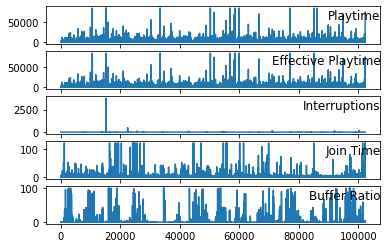

In [36]:
from matplotlib import pyplot

values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 4]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

**4.1 Handling Outliers**

In [37]:
df.describe()

Playtime  Effective Playtime  Interruptions      Join Time  \
count  102256.000000       102256.000000  102256.000000  102256.000000   
mean      328.965479          288.338454       0.099544       1.158462   
std      1799.357645         1697.491699      12.007473       2.843884   
min         0.000000            0.000000       0.000000       0.000000   
25%         4.000000            1.000000       0.000000       0.583000   
50%        22.000000           17.000000       0.000000       0.790000   
75%        90.000000           75.000000       0.000000       1.302000   
max     86404.000000        86402.000000    3786.000000     120.000000   

        Buffer Ratio  Connection Type         Device    Device Type  \
count  102256.000000    102256.000000  102256.000000  102256.000000   
mean        0.261755        12.391116       2.391889       8.690757   
std         3.568773         4.246433       3.569991       2.438083   
min         0.000000         0.000000       0.000000       0.000000   
25%         0.000000         7.000000       1.000000       8.000000   
50%         0.000000        15.000000       1.000000      10.000000   
75%         0.000000        16.000000       1.000000      10.000000   
max       100.000000        18.000000      14.000000      12.000000   

             Browser             OS     OS Version      Device ID  \
count  102256.000000  102256.000000  102256.000000  102256.000000   
mean        0.859470       0.831179       5.934243     724.722393   
std         2.354904       1.921155      14.757550     513.058420   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000     197.000000   
50%         0.000000       0.000000       0.000000     696.000000   
75%         0.000000       0.000000       0.000000    1195.000000   
max        14.000000       8.000000      77.000000    1691.000000   

       Happiness Value  Happiness Score  Playback Stalls  \
count    102256.000000    102256.000000    102256.000000   
mean          0.954986         5.166843         0.003805   
std           1.107007         4.381398         0.202198   
min           0.000000        -1.000000         0.000000   
25%           0.000000         0.000000         0.000000   
50%           1.000000         6.646500         0.000000   
75%           1.000000         9.607000         0.000000   
max           4.000000        10.000000        44.408000   

       Startup Error (Count)        Latency   Crash Status  \
count          102256.000000  102256.000000  102256.000000   
mean                0.013564   13360.818788       1.006914   
std                 0.115673   23550.856009       0.134147   
min                 0.000000       0.000000       0.000000   
25%                 0.000000       0.000000       1.000000   
50%                 0.000000   17862.000000       1.000000   
75%                 0.000000   19235.000000       1.000000   
max                 1.000000  359477.000000       2.000000   

       End of Playback Status      User_ID_N        Title_N  Program_N  \
count           102256.000000  102256.000000  102256.000000   102256.0   
mean                 2.956638     392.976686     809.658494        0.0   
std                  0.297459     161.309073     527.743379        0.0   
min                  0.000000       0.000000       0.000000        0.0   
25%                  3.000000     295.000000     261.000000        0.0   
50%                  3.000000     383.000000     997.000000        0.0   
75%                  3.000000     487.000000    1170.250000        0.0   
max                  3.000000     699.000000    1638.000000        0.0   

       Device_Vendor_N  Device_Model_N  Content_TV_Show_N      Country_N  \
count    102256.000000   102256.000000      102256.000000  102256.000000   
mean         13.127699       69.461704        2421.410568       3.933021   
std           4.624751       33.347175         631.704165       2.546806   
min         

It can be seen, the dataset have many outliers in some of the features. We will plotting the value to have more view about the outliers 

In [38]:
fig = px.scatter(x=df['Playtime'], y=df['Interruptions'])

fig.show()

It can be seen from the graph of Playtime and interruption column, there is outliers in the dataset. To handle the outliers, we propose statistical method called interquartile range (IQR) instead of using Z-score. Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. 

The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1). This method can also handling multivariate data

In [39]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [40]:
outliers = find_outliers_IQR(df)

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 102256
max outlier value: Playtime                   86404.000
Effective Playtime         86402.000
Interruptions               3786.000
Join Time                    120.000
Buffer Ratio                 100.000
Connection Type                  NaN
Device                        14.000
Device Type                    4.000
Browser                       14.000
OS                             8.000
OS Version                    77.000
Device ID                        NaN
Happiness Value                4.000
Happiness Score                  NaN
Playback Stalls               44.408
Startup Error (Count)          1.000
Latency                   359477.000
Crash Status                   2.000
End of Playback Status         2.000
User_ID_N                      6.000
Title_N                          NaN
Program_N                        NaN
Device_Vendor_N               24.000
Device_Model_N               163.000
Content_TV_Show_N           2746.000
Country_N                    

In [42]:
outliers = find_outliers_IQR(df["Playtime"])

outliers.head()

Start Time
2022-07-12 00:00:15    241
2022-07-12 00:01:52    254
2022-07-12 00:05:12    258
2022-07-12 00:07:59    243
2022-07-12 00:09:51    255
Name: Playtime, dtype: int64

In [43]:
def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = not_outliers.dropna().reset_index()

   return outliers_dropped

In [44]:
outliers_dropped = drop_outliers_IQR(df)
outliers_dropped.head()

Start Time  Playtime  Effective Playtime  Interruptions  Join Time  \
0 2022-07-12 00:00:38      73.0                72.0            0.0      1.170   
1 2022-07-12 00:02:02      21.0                20.0            0.0      1.133   
2 2022-07-12 00:02:24       1.0                 0.0            0.0      0.000   
3 2022-07-12 00:02:25       1.0                 0.0            0.0      0.000   
4 2022-07-12 00:02:27       1.0                 0.0            0.0      0.000   

   Buffer Ratio  Connection Type  Device  Device Type  Browser   OS  \
0           0.0               16     1.0         10.0      0.0  0.0   
1           0.0               16     1.0         10.0      0.0  0.0   
2           0.0               16     1.0         10.0      0.0  0.0   
3           0.0               16     1.0         10.0      0.0  0.0   
4           0.0               16     1.0         10.0      0.0  0.0   

   OS Version  Device ID  Happiness Value  Happiness Score  Playback Stalls  \
0         0.0        387              1.0            9.399              0.0   
1         0.0        197              2.0            6.999              0.0   
2         0.0        197              0.0            0.000              0.0   
3         0.0        197              0.0            0.000              0.0   
4         0.0        197              0.0            0.000              0.0   

   Startup Error (Count)  Latency  Crash Status  End of Playback Status  \
0                    0.0  19033.0           1.0                     3.0   
1                    0.0  19071.0           1.0                     3.0   
2                    0.0      0.0           1.0                     3.0   
3                    0.0      0.0           1.0                     3.0   
4                    0.0      0.0           1.0                     3.0   

   User_ID_N  Title_N  Program_N  Device_Vendor_N  Device_Model_N  \
0      480.0        1          0             13.0            63.0   
1      346.0      786          0             13.0            63.0   
2      346.0      997          0             13.0            63.0   
3      346.0      997          0             13.0            63.0   
4      346.0      997          0             13.0            63.0   

   Content_TV_Show_N  Country_N  City_N  Region_N  
0             2672.0        3.0      76       0.0  
1             2672.0        3.0      76       0.0  
2             2672.0        3.0      76       0.0  
3             2672.0        3.0      76       0.0  
4             2672.0        3.0      76       0.0

In [45]:
outliers_dropped.isna().sum()

Start Time                0
Playtime                  0
Effective Playtime        0
Interruptions             0
Join Time                 0
Buffer Ratio              0
Connection Type           0
Device                    0
Device Type               0
Browser                   0
OS                        0
OS Version                0
Device ID                 0
Happiness Value           0
Happiness Score           0
Playback Stalls           0
Startup Error (Count)     0
Latency                   0
Crash Status              0
End of Playback Status    0
User_ID_N                 0
Title_N                   0
Program_N                 0
Device_Vendor_N           0
Device_Model_N            0
Content_TV_Show_N         0
Country_N                 0
City_N                    0
Region_N                  0
dtype: int64

In [46]:
outliers_dropped.describe()

Playtime  Effective Playtime  Interruptions     Join Time  \
count  47541.000000        47541.000000        47541.0  47541.000000   
mean      34.380619           33.401422            0.0      0.831210   
std       36.528396           36.435533            0.0      0.457185   
min        0.000000            0.000000            0.0      0.000000   
25%        3.000000            2.000000            0.0      0.595000   
50%       19.000000           17.000000            0.0      0.731000   
75%       71.000000           70.000000            0.0      0.984000   
max      203.000000          186.000000            0.0      2.379000   

       Buffer Ratio  Connection Type   Device  Device Type  Browser       OS  \
count       47541.0     47541.000000  47541.0      47541.0  47541.0  47541.0   
mean            0.0        11.935677      1.0         10.0      0.0      0.0   
std             0.0         4.450649      0.0          0.0      0.0      0.0   
min             0.0         2.000000      1.0         10.0      0.0      0.0   
25%             0.0         7.000000      1.0         10.0      0.0      0.0   
50%             0.0        16.000000      1.0         10.0      0.0      0.0   
75%             0.0        16.000000      1.0         10.0      0.0      0.0   
max             0.0        16.000000      1.0         10.0      0.0      0.0   

       OS Version     Device ID  Happiness Value  Happiness Score  \
count     47541.0  47541.000000     47541.000000     47541.000000   
mean          0.0    689.306599         0.705980         5.207819   
std           0.0    520.966293         0.658017         4.437692   
min           0.0     47.000000         0.000000         0.000000   
25%           0.0    197.000000         0.000000         0.000000   
50%           0.0    387.000000         1.000000         6.649000   
75%           0.0   1195.000000         1.000000         9.525000   
max           0.0   1680.000000         2.000000         9.972000   

       Playback Stalls  Startup Error (Count)       Latency  Crash Status  \
count          47541.0                47541.0  47541.000000       47541.0   
mean               0.0                    0.0  12761.911192           1.0   
std                0.0                    0.0  10441.836931           0.0   
min                0.0                    0.0      0.000000           1.0   
25%                0.0                    0.0      0.000000           1.0   
50%                0.0                    0.0  18370.000000           1.0   
75%                0.0                    0.0  19266.000000           1.0   
max                0.0                    0.0  47293.000000           1.0   

       End of Playback Status     User_ID_N       Title_N  Program_N  \
count                 47541.0  47541.000000  47541.000000    47541.0   
mean                      3.0    396.959656    746.096717        0.0   
std                       0.0    140.851663    541.419080        0.0   
min                       3.0      8.000000      0.000000        0.0   
25%                       3.0    315.000000    231.000000        0.0   
50%                       3.0    346.000000    911.000000        0.0   
75%                       3.0    480.000000   1095.000000        0.0   
max                       3.0    699.000000   1629.000000        0.0   

       Device_Vendor_N  Device_Model_N  Content_TV_Show_N  Country_N  \
count     47541.000000    47541.000000            47541.0    47541.0   
mean         14.711176       63.564713             2672.0        3.0   
std           1.485076        0.495800                0.0        0.0   
min          13.000000       63.000000             2672.0        3.0   
25%          13.000000       63.000000             2672.0        3.0   
50%          16.000000       64.000000             2672.0        3.0   
75%          16.000000       64.000000             2672.0        3.0   
max          16.000000       64.000000             2672.0        3.0   

             City_N  Region

In [47]:
fig = px.scatter(x=outliers_dropped['Playtime'], y=outliers_dropped['Interruptions'])

fig.show()

In [48]:
import plotly.express as px 

fig = px.line(outliers_dropped, x="Start Time", y="Playtime")
fig

In [49]:
import plotly.express as px 

fig = px.line(outliers_dropped, x="Start Time", y="Latency")
fig

It can be seen in the graph, the outliers are removed from the dataset,  

**4.2 REDUCTION DIMENSIONALITY FEATURES**

In [50]:
outliers_dropped.set_index("Start Time", inplace=True)

The dataset had many features that we might not need, Because of this reason, we implement Principal Component Analysis (PCA) method to reduction the variable of the features in dataset. Also, we check how many features actually needs and have strong correlation between each other

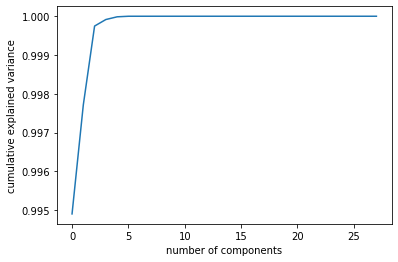

In [51]:
from sklearn.decomposition import PCA # for PCA calculation
pca = PCA()
X_pca = pca.fit(outliers_dropped)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

From the graph, it can be seen that the cummulative explained variance is between 0.999 to 1.00. or between 5 to 10 component. So, we decide to set the hyperparameter for the n_components in PCA to 0.9999999

In [52]:
pca = PCA(n_components = 0.9999999)
X_pca = pca.fit_transform(outliers_dropped) # this will fit and reduce dimensions
print(f"number of features recommended : ", pca.n_components_)

number of features recommended :  7


In [53]:
pd.DataFrame(pca.components_, columns = outliers_dropped.columns)

Playtime  Effective Playtime  Interruptions  Join Time  Buffer Ratio  \
0  0.002009            0.002014  -0.000000e+00   0.000012 -1.654361e-24   
1  0.013995            0.013828  -2.220446e-16   0.000159  5.551115e-17   
2 -0.009245           -0.008829   1.665335e-16   0.000036  0.000000e+00   
3 -0.005495           -0.005663  -3.469447e-18  -0.000081  1.387779e-17   
4 -0.061932           -0.060582  -8.326673e-17  -0.000051  1.665335e-16   
5  0.704127            0.701978   5.134781e-16   0.000442  0.000000e+00   
6 -0.016037            0.029544   2.142383e-16  -0.015186 -6.314393e-16   

   Connection Type        Device   Device Type       Browser            OS  \
0         0.000043 -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00   
1        -0.001363  0.000000e+00 -2.067952e-25  0.000000e+00  0.000000e+00   
2        -0.001639  0.000000e+00  0.000000e+00  5.048710e-29  0.000000e+00   
3         0.008513  1.110223e-16  0.000000e+00  1.323489e-23  0.000000e+00   
4        -0.013128 -0.000000e+00 -5.421011e-20  2.646978e-23 -0.000000e+00   
5         0.007225  1.387779e-17  5.421011e-20  0.000000e+00  0.000000e+00   
6        -0.968082 -9.692767e-17  1.110223e-16  0.000000e+00  1.387779e-17   

     OS Version  Device ID  Happiness Value  Happiness Score  Playback Stalls  \
0 -0.000000e+00  -0.012300         0.000033         0.000240             -0.0   
1  0.000000e+00   0.615608        -0.000179         0.000584              0.0   
2  0.000000e+00   0.787666        -0.000259        -0.002365              0.0   
3  0.000000e+00  -0.018161        -0.001476        -0.002518              0.0   
4  9.860761e-32  -0.010502        -0.000118        -0.009933             -0.0   
5 -2.524355e-29  -0.002970         0.004056         0.055947              0.0   
6  0.000000e+00  -0.002421         0.020365        -0.011868              0.0   

   Startup Error (Count)   Latency  Crash Status  End of Playback Status  \
0                   -0.0  0.999827          -0.0                    -0.0   
1                    0.0 -0.002860           0.0                     0.0   
2                    0.0  0.017924           0.0                     0.0   
3                    0.0  0.002691           0.0                     0.0   
4                   -0.0  0.001713          -0.0                    -0.0   
5                    0.0 -0.002405           0.0                     0.0   
6                    0.0  0.000002           0.0                     0.0   

   User_ID_N   Title_N  Program_N  Device_Vendor_N  Device_Model_N  \
0   0.003235 -0.013020       -0.0        -0.000032       -0.000011   
1   0.015543 -0.786985        0.0         0.000514        0.000174   
2  -0.034348  0.613437        0.0         0.001067        0.000350   
3  -0.997485 -0.036455        0.0        -0.002158       -0.000719   
4   0.059003 -0.049947       -0.0         0.003253        0.001149   
5  -0.003556  0.018865        0.0        -0.003064       -0.001305   
6  -0.009580  0.000490        0.0         0.233453        0.078421   

   Content_TV_Show_N  Country_N    City_N  Region_N  
0               -0.0       -0.0 -0.002450      -0.0  
1                0.0        0.0 -0.032289       0.0  
2                0.0        0.0  0.040029       0.0  
3                0.0        0.0  0.056644       0.0  
4               -0.0       -0.0  0.993037      -0.0  
5                0.0        0.0  0.088539       0.0  
6                0.0        0.0 -0.012400       0.0

In [54]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = outliers_dropped.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

print(f"most important features : ", most_important_names)

most important features :  ['Latency', 'Title_N', 'Device ID', 'User_ID_N', 'City_N', 'Playtime', 'Connection Type']


From the PCA result, we have 7 features with strong correlation between each other. We will use this 7 features to do time series analysis before performing Change Detection

In [55]:
el_df = outliers_dropped[['Latency', 'Title_N', 'Device ID', 'User_ID_N', 'City_N', 'Playtime', 'Connection Type']]
el_df.head()

Latency  Title_N  Device ID  User_ID_N  City_N  Playtime  \
Start Time                                                                      
2022-07-12 00:00:38  19033.0        1        387      480.0      76      73.0   
2022-07-12 00:02:02  19071.0      786        197      346.0      76      21.0   
2022-07-12 00:02:24      0.0      997        197      346.0      76       1.0   
2022-07-12 00:02:25      0.0      997        197      346.0      76       1.0   
2022-07-12 00:02:27      0.0      997        197      346.0      76       1.0   

                     Connection Type  
Start Time                            
2022-07-12 00:00:38               16  
2022-07-12 00:02:02               16  
2022-07-12 00:02:24               16  
2022-07-12 00:02:25               16  
2022-07-12 00:02:27               16

array([<Axes: xlabel='Start Time'>, <Axes: xlabel='Start Time'>,
       <Axes: xlabel='Start Time'>, <Axes: xlabel='Start Time'>,
       <Axes: xlabel='Start Time'>, <Axes: xlabel='Start Time'>,
       <Axes: xlabel='Start Time'>], dtype=object)

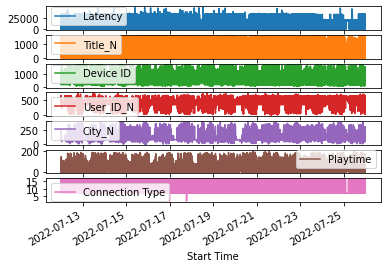

In [56]:
el_df.plot(subplots=True)

**5. Time Series Analysis**

**Vector Auto Regression (VAR)**

In this section, we will introduce to one of the most commonly used methods for multivariate time series forecasting – Vector Auto Regression (VAR).

In a VAR algorithm, each variable is a linear function of the past values of itself and the past values of all the other variables. VAR is able to understand and use the relationship between several variables. This is useful for describing the dynamic behavior of the data and also provides better forecasting results. Additionally, implementing VAR is as simple as using any other univariate technique.

With VAR models, it is possible to elucidate the values of endogenous variables by considering their previously observed values

In [57]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

data = el_df

# Check for stationarity of the time series
def adf_test(series, signif=0.05):
    result = adfuller(series, autolag='AIC')
    pvalue = result[1]
    if pvalue <= signif:
        return True
    else:
        return False

# If any of the series are not stationary, apply differencing until they become stationary
non_stationary_variables = [var for var in data.columns if not adf_test(data[var])]

while len(non_stationary_variables) > 0:
    data = data.diff().dropna()
    non_stationary_variables = [var for var in data.columns if not adf_test(data[var])]

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Fit the VAR model
model = VAR(train_data)
best_aic = np.inf
best_order = None

# Find the best order (p) for the VAR model
for p in range(1, 10):
    result = model.fit(p)
    if result.aic < best_aic:
        best_aic = result.aic
        best_order = p

# Fit the VAR model with the best order
var_model = model.fit(best_order)
print(var_model.summary())

# Forecast the next n steps
n_steps = len(test_data)
forecast = var_model.forecast(train_data.values[-best_order:], steps=n_steps)

# Calculate RMSE and other evaluation metrics if necessary
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)
rmse_values = {var: rmse(test_data[var], forecast_df[var]) for var in test_data.columns}
print("RMSE values for each variable: ", rmse_values)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 19, Mar, 2023
Time:                     22:25:01
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    69.8743
Nobs:                     38023.0    HQIC:                   69.8055
Log likelihood:      -1.70372e+06    FPE:                2.00575e+30
AIC:                      69.7736    Det(Omega_mle):     1.98227e+30
--------------------------------------------------------------------
Results for equation Latency
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                   8113.274542       513.291865           15.806           0.000
L1.Latency                -0.007386         0.006097           -1.212           0.226
L1.Title_N                -1.775595   

From the RMSE result it can be seen variable with the best RMSE is Connection Type with RMSE 4.87. and the worst is Latency with RMSE 10064 which is really bad. 

Connection Type probably can have best RMSE because it have the least unique value than other variable and Latency have the most unique value more than the other. And from all of them, we can say that Playtime is the best variable that have good RMSE with hundreds of unique value.

In [58]:
data.nunique()

Latency            4897
Title_N             473
Device ID           190
User_ID_N           177
City_N              161
Playtime            194
Connection Type       5
dtype: int64

**Plot VAR result**

**Latency**

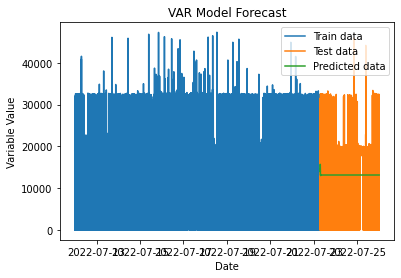

In [59]:
# Plot the actual and predicted data for Latency
plt.plot(train_data.index, train_data['Latency'], label='Train data')
plt.plot(test_data.index, test_data['Latency'], label='Test data')
plt.plot(forecast_df.index, forecast_df['Latency'], label='Predicted data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Variable Value')
plt.title('VAR Model Forecast')
plt.show()

**Title_N**

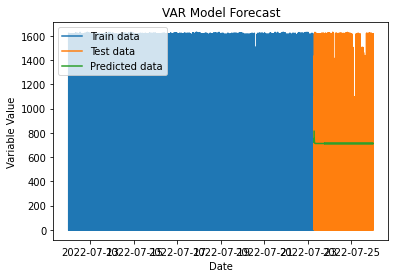

In [60]:
# Plot the actual and predicted data for Latency
plt.plot(train_data.index, train_data['Title_N'], label='Train data')
plt.plot(test_data.index, test_data['Title_N'], label='Test data')
plt.plot(forecast_df.index, forecast_df['Title_N'], label='Predicted data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Variable Value')
plt.title('VAR Model Forecast')
plt.show()

**Device ID**

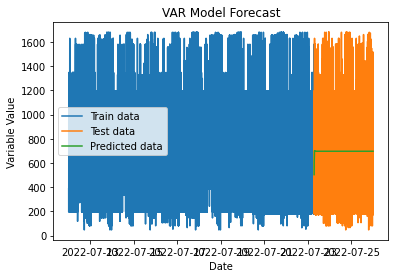

In [61]:
# Plot the actual and predicted data for Latency
plt.plot(train_data.index, train_data['Device ID'], label='Train data')
plt.plot(test_data.index, test_data['Device ID'], label='Test data')
plt.plot(forecast_df.index, forecast_df['Device ID'], label='Predicted data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Variable Value')
plt.title('VAR Model Forecast')
plt.show()

**User_ID_N**

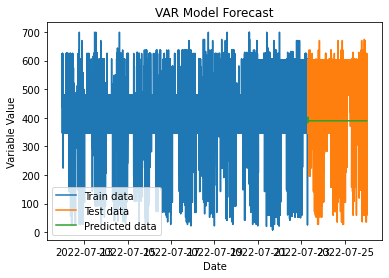

In [62]:
# Plot the actual and predicted data for Latency
plt.plot(train_data.index, train_data['User_ID_N'], label='Train data')
plt.plot(test_data.index, test_data['User_ID_N'], label='Test data')
plt.plot(forecast_df.index, forecast_df['User_ID_N'], label='Predicted data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Variable Value')
plt.title('VAR Model Forecast')
plt.show()

**City_N**

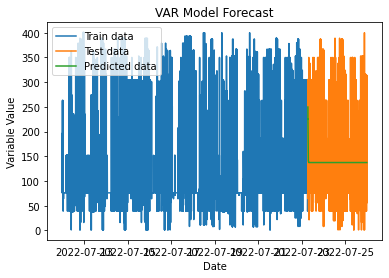

In [63]:
# Plot the actual and predicted data for Latency
plt.plot(train_data.index, train_data['City_N'], label='Train data')
plt.plot(test_data.index, test_data['City_N'], label='Test data')
plt.plot(forecast_df.index, forecast_df['City_N'], label='Predicted data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Variable Value')
plt.title('VAR Model Forecast')
plt.show()

**Playtime**

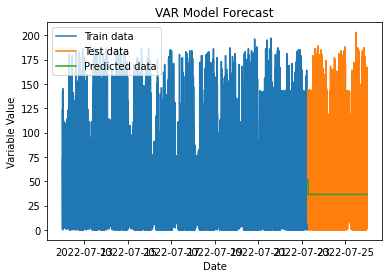

In [64]:
# Plot the actual and predicted data for Latency
plt.plot(train_data.index, train_data['Playtime'], label='Train data')
plt.plot(test_data.index, test_data['Playtime'], label='Test data')
plt.plot(forecast_df.index, forecast_df['Playtime'], label='Predicted data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Variable Value')
plt.title('VAR Model Forecast')
plt.show()

**Connection Type**

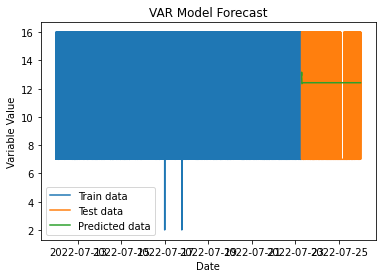

In [65]:
# Plot the actual and predicted data for Latency
plt.plot(train_data.index, train_data['Connection Type'], label='Train data')
plt.plot(test_data.index, test_data['Connection Type'], label='Test data')
plt.plot(forecast_df.index, forecast_df['Connection Type'], label='Predicted data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Variable Value')
plt.title('VAR Model Forecast')
plt.show()

**5.1 Dataset resampling**

The time series dataset has many data points that may be difficult to analyze and visualize. We need to resample the time by compressing and aggregating it to daily intervals, since we just have 2 weeks time window. We will have fewer data points that are easier to analyze.

The resample() method will aggregate all the data points in the time series and change them to daily intervals.

In [66]:
el_df.resample('D').mean()

Latency     Title_N   Device ID   User_ID_N      City_N  \
Start Time                                                                 
2022-07-12  12151.056582  714.205158  802.829099  398.514627  116.398768   
2022-07-13  11929.173205  724.323464  801.277942  372.467802  105.321984   
2022-07-14  12128.364789  718.329728  854.959717  382.334950  136.234241   
2022-07-15  14123.135806  676.980432  644.004965  369.883178  138.552862   
2022-07-16  15679.841479  642.924394  525.190685  351.493108  110.880117   
2022-07-17  12596.227788  651.786225  767.807692  380.294275  161.032499   
2022-07-18  13451.773993  668.924009  674.250573  375.069112  118.168359   
2022-07-19  12639.570196  624.505651  789.284355  408.683522  117.255503   
2022-07-20  12429.188605  750.503929  662.379830  411.695481  137.739686   
2022-07-21  12927.706587  814.757485  684.814602  418.073008  166.203593   
2022-07-22  12287.747874  823.323162  653.466233  404.252376  173.640320   
2022-07-23  11369.518291  892.413084  631.493458  400.442457  203.205607   
2022-07-24  10010.591199  929.494499  676.971627  438.627099  173.319050   
2022-07-25  13657.457468  781.508707  639.071333  454.650703  150.634628   

             Playtime  Connection Type  
Start Time                              
2022-07-12  41.993072        12.588145  
2022-07-13  40.392672        11.944115  
2022-07-14  39.088400        12.284968  
2022-07-15  35.696846        13.179030  
2022-07-16  31.321220        14.260860  
2022-07-17  33.043530        12.344663  
2022-07-18  37.380282        12.749427  
2022-07-19  40.363772        12.395300  
2022-07-20  38.748854        12.098559  
2022-07-21  35.039613        11.598111  
2022-07-22  32.392196        11.061781  
2022-07-23  27.621362        10.302003  
2022-07-24  20.842791         9.995947  
2022-07-25  34.558272         9.870730

array([<Axes: xlabel='Start Time'>, <Axes: xlabel='Start Time'>,
       <Axes: xlabel='Start Time'>, <Axes: xlabel='Start Time'>,
       <Axes: xlabel='Start Time'>, <Axes: xlabel='Start Time'>,
       <Axes: xlabel='Start Time'>], dtype=object)

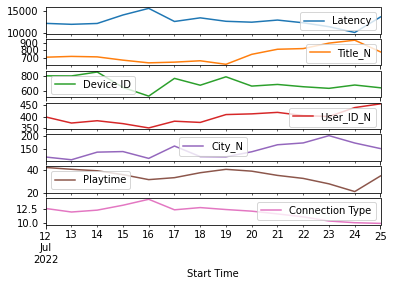

In [67]:
el_df.resample('D').mean().plot(subplots=True)

With resampling data we also can view the time series data like performing with moving average because it works with calculating the mean value with Day parameter, because we just have time series data for 14 days

In [68]:
final_df = el_df.resample('D').mean()

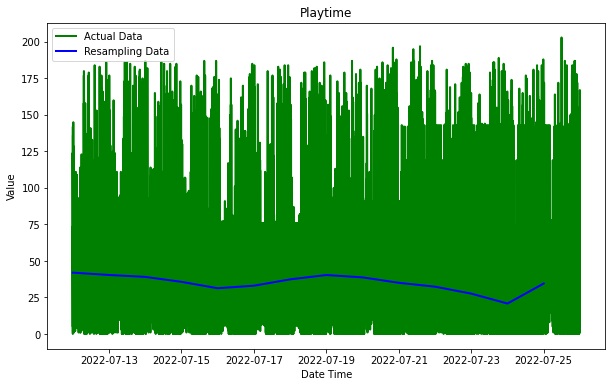

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(data['Playtime'], label='Actual Data', color='green', linewidth=2)

# Plot the second line graph on the same axes
ax.plot(final_df['Playtime'], label='Resampling Data', color='blue', linewidth=2)

# Add a legend to the graph
ax.legend()

# Add axis labels and a title
ax.set_xlabel('Date Time')
ax.set_ylabel('Value')
ax.set_title('Playtime')

# Show the graph
plt.show()

In this section, We finish with preprocessing dataset and cleaning from residual or outliers. We also performing time series analysis using VAR method. And from the analysis we know that the best variable is Playtime. Also we resampling dataset to create clear view and we find using resampling, it also can view Moving Average shape from the dataset. 

The next step is performing Change Detection in the dataset and since we know that the best variable in dataset is Playtime, so we will perform Change Detection in Playtime variable

**6. Change Detection**

**6.1 Change Detection using Window-Based Search Method**

Window-based search method Iss a relatively simple approximate search method. The window-based search method “computes the discrepancy between two adjacent windows that move along with signal y”. When the two windows are highly dissimilar, a high discrepancy between the two values occurs, which is indicative of a change point. Upon generating a discrepancy curve, the algorithm locates optimal change point indices in the sequence 

In [70]:
!pip install ruptures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.1 MB/s eta 0:00:00


In [71]:
import ruptures as rpt
points=np.array(data['Playtime'])

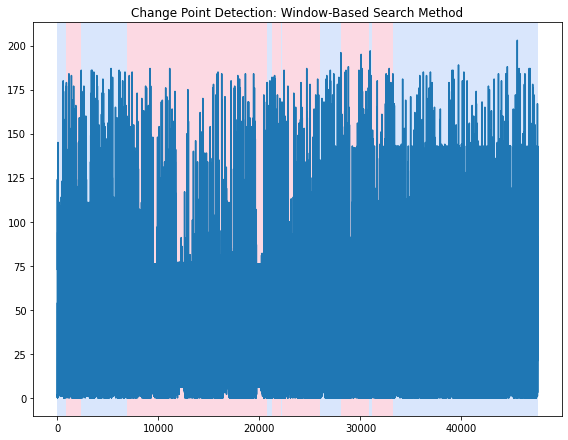

In [77]:
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=14)
rpt.show.display(points, my_bkps, figsize=(8, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

**6.2 Change Detection Using CUSUM Detector Method**

CUSUM (Cumulative Sum) detector is a statistical algorithm used for detecting changes or shifts in the mean or variance of a time series data.

The basic idea behind the CUSUM algorithm is to calculate the cumulative sum of the deviations of the data points from the mean or target value. If the sum exceeds a certain threshold, it indicates a change point.

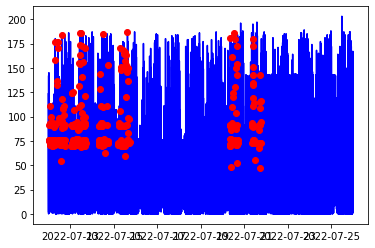

In [78]:
from scipy.stats import norm

# Compute mean and standard deviation of data
mean = data['Playtime'].mean()
std = data['Playtime'].std()

# Set CUSUM detector parameters
h = 5 * std
delta = 0.01 * std

# Initialize CUSUM detector
cusum = 0

# Detect change points
cp_indexes = []
for i, value in enumerate(data['Playtime']):
    cusum += (value - mean - delta)
    if cusum > h:
        cp_indexes.append(i)
        cusum = 0

# Plot data and change points
plt.plot(data.index, data['Playtime'], color='blue')
plt.plot(data.index[cp_indexes], data['Playtime'][cp_indexes], 'o', color='red')
plt.show()